# DS 3000 - Assignment 6

**Student Name**: Savir Khanna

**Date**: 10/10/25


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

(0pts) Load the attached data into a pandas dataframe: diamonds.csv Download diamonds.csv 
This dataset contains the price of diamonds based on various attributes. For more information about the variables, read the description on kaggle.comLinks to an external site.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

In [5]:
df = pd.read_csv("diamonds.csv")
df = df.rename(columns={"Unnamed: 0": "counter"})
df.head()

,counter,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Question 2: 
(5 pts) Select any two variables of your choice and explain its statistical summary, e.g. mean, median, min, max, etc.
Note: you can use the .describe() method from the dataframe to obtain the descriptive statistics, or any suitable approach.

In [6]:
df["depth"].describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

The depth represents the total depth percentage (where z is the depth). Using the .describe() function, we can see the mean is around 61.7%, with a minimum of 43% and a maximum of 75%. The standard deviation is extrememly low, hinting at the similarity of most of these diamonds, in terms of depth percentage at least. The quartile ranges support this, all being from 61-63%.

In [7]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

The price represents the buying price of each diamond. The .describe() function yields a mean of 3932.80, a minimum of 326, and a maximum of 18823 dollars. Based off these metrics and the large standard deviation (around 1x the mean) we can assume a relatively skewed distribution with a high mean due to the frequency of high outliers.

## Question 3: 
(5 pts) Create a bar chart that shows the frequency of diamonds grouped by cut. Explain the chart.

Text(0.5, 1.0, 'Frequency of Diamonds per Cut')

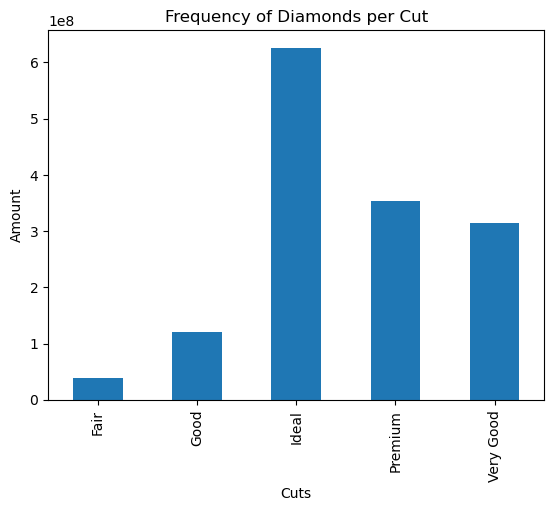

In [8]:
grouped_df = df.groupby(["cut"])["counter"].sum()

grouped_df.plot(kind='bar')

plt.xlabel("Cuts")
plt.ylabel("Amount")
plt.title("Frequency of Diamonds per Cut")

After grouping the diamonds by cut, its apparent that most cuts are ideal, with a good many of them also being premium and very good.

## Question 4: 
(5 pts) Create a scatterplot that shows the relationship between carat and price. Explain the chart and comment on the relationship between the variables.

Text(0.5, 1.0, 'Carat vs Price')

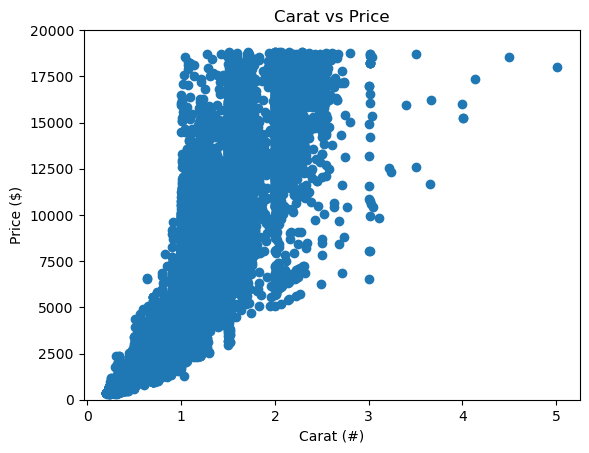

In [9]:
plt.scatter(df["carat"], df["price"])

plt.xlabel("Carat (#)")
plt.ylim(0, 20000)
plt.ylabel("Price ($)")
plt.title("Carat vs Price")

As the carat number goes up, it's clear the price increases as well. But it's not a linearly proportional relationship like one may expect. At some point between 1-2 carats there are clear diminishing returns. Many carats between 1-3 are all priced similarly, with even the scant few being 3+ being valued similarly or less.

## Question 5: 
(10 pts) Calculate the Pearson Correlation coefficient of carat and price. Explain the results and discuss the strength of the correlation.

The correlation coefficient measures a linear correlation on a scale of -1 to 1, where 0 represents no correlation whatsoever.

In [10]:
r_coefficient = df['carat'].corr(df['price'], method='pearson')
r_coefficient

np.float64(0.9215913011934772)

The pearson correlation coefficient for carat and price is around 0.922, indicating an extremely positive correlation. This number supports the scatterplot for question 4, where one could see a very clear correlation for higher carat meant higher price fetched for the diamonds. It's a very strong correlation, with the caveat that at a certain point the correlation stablizes and doesn't keep increasing, so the r-value would not be higher.

## Question 6: 
(15 pts) Create a histogram (or boxplot) that shows the distribution of prices based on the quality of the cut. Explain the charts and skew.
Note: this question is asking you to show the distribution of diamond prices for each cut. There should be a separate histogram/boxplot for each cut.

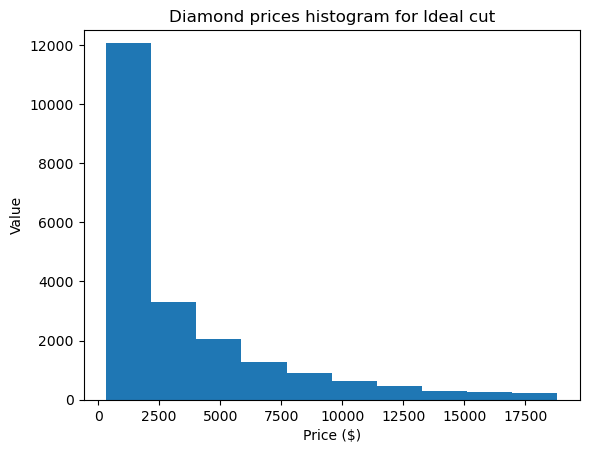

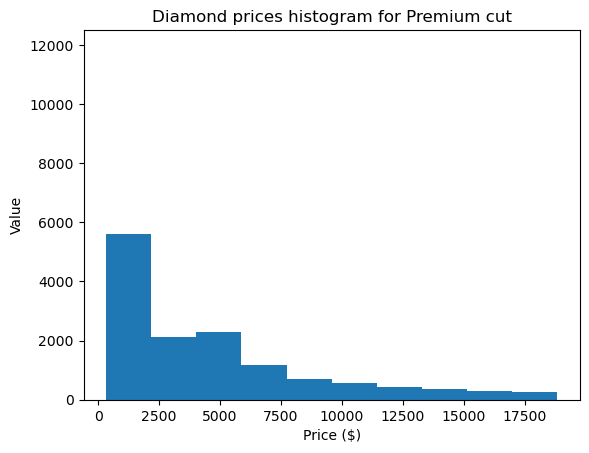

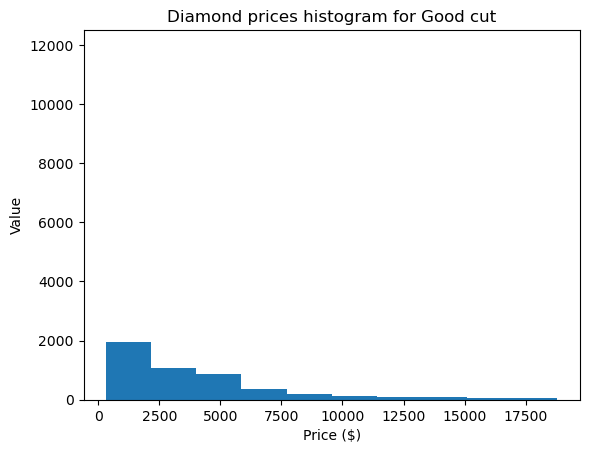

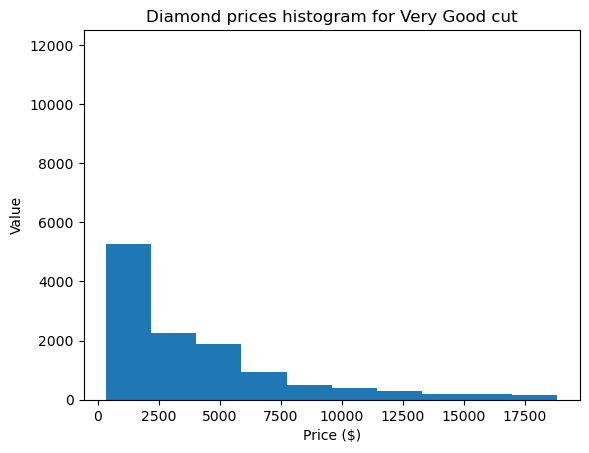

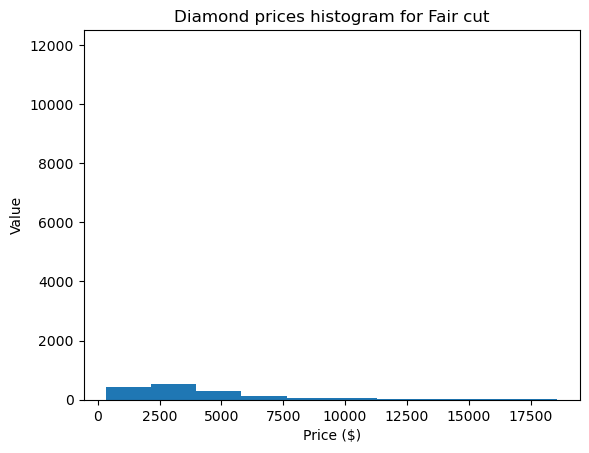

In [17]:
unique_cut = df['cut'].unique()

for cut in unique_cut:
    cut_df = df[df["cut"] == cut]
    
    plt.hist(cut_df['price'])
    plt.title(f'Diamond prices histogram for {cut} cut')
    plt.ylabel('Value')
    plt.xlabel('Price ($)')
    plt.ylim(0, 12500)
    
    plt.show() 

Premium box sales were the on average the highest compared to the other cuts. Fair, Very Good, and Good cuts all had mariginal differences, with Fair Cuts having slighter higher albeit with a significantly smaller sample size. 

## Question 7: 
(10 pts) Using a 2-sample t-test**, determine if there is a statistical difference between the price of diamonds with a cut that is considered:
'Good' vs 'Very Good'
'Premium' vs 'Ideal'
**set alpha to 5% i.e. 0.05.

In [20]:
good_cut_prices = df[df['cut'] == 'Good']['price']
v_good_cut_prices = df[df['cut'] == 'Very Good']['price']

premium_cut_prices = df[df['cut'] == 'Premium']['price']
ideal_cut_prices = df[df['cut'] == 'Ideal']['price']

t_stat_1, p_value_1 = stats.ttest_ind(good_cut_prices, v_good_cut_prices, equal_var=True)

t_stat_2, p_value_2 = stats.ttest_ind(premium_cut_prices, ideal_cut_prices, equal_var=True)

print(f"First t-test: t-statistic = {t_stat_1:.2f}, p-value = {p_value_1:.3f}")
print(f"Second t-test: t-statistic = {t_stat_2:.2f}, p-value = {p_value_2:.3f}")

First t-test: t-statistic = -0.81, p-value = 0.419
Second t-test: t-statistic = 25.65, p-value = 0.000


Good vs very good: the 2-sample t-test the p-value of 0.419 which is much greater than the alpha value of 0.05, meaning we fail to reject the null hypothesis and there isn't a statistical difference between "Good" and "Very Good" cuts. 
For Premium vs ideal, the 2-sample t-test yielded a p-value of 0.000, under the alpha value of 0.05. The t-statistic is also greater than 1.96, so we can reject the null hypothesis and conclude a statistical difference between "Premium" and "Ideal" cuts.

## Question 8: 
(7 pts) [optional/challenge question] Many statistical test rely on the assumption that data is normally distributed. Indicate which distributions in question 6 were skewed, and research one possible technique* that can be used to handle skewed data. Then perform the following:
Demonstrate the selected technique to correct the skewed data.
Repeat the analysis in question 6 using the corrected data and explain the difference in the distribution with the previous results.
Repeat the statistical tests in question 7 using the corrected data. Are there any changes in the statistical significance? Explain the results.
*Helpful tip: Click here to watch a video about correcting skewed data.Links to an external site.

Diamond prices at Ideal cut definitely seem skewed to the right with a abnormal proportional being sold at lower values compared to a normal distribution where most would be in the middle. There are many data transformations to alter skewed data, for example the log transformation which replaces every value in the dataset with the log of it. It stablizes variance and normalizes the distribution appropriately.

In [34]:
df["log_price"] = np.log(df["price"])
df

,counter,carat,cut,color,clarity,depth,table,price,x,y,z,sqrt_price,log_price
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5.786897,5.786897
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5.786897,5.786897
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5.789960,5.789960
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5.811141,5.811141
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5.814131,5.814131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,7.921898,7.921898
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,7.921898,7.921898
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,7.921898,7.921898
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,7.921898,7.921898


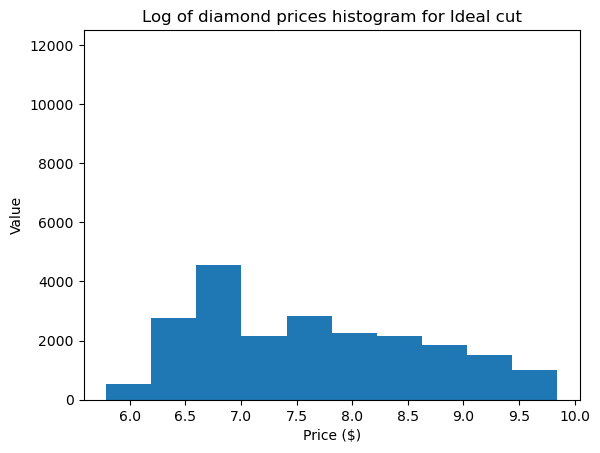

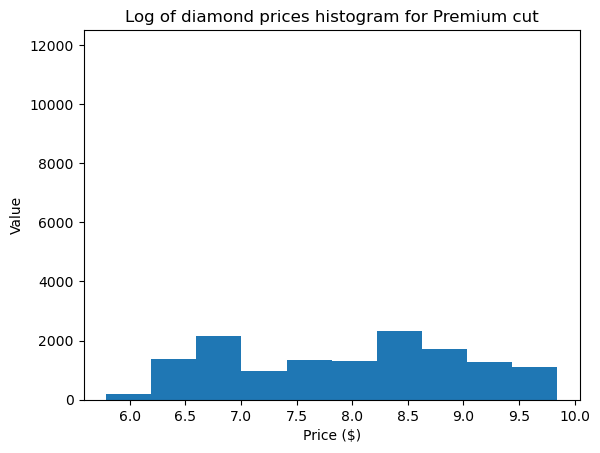

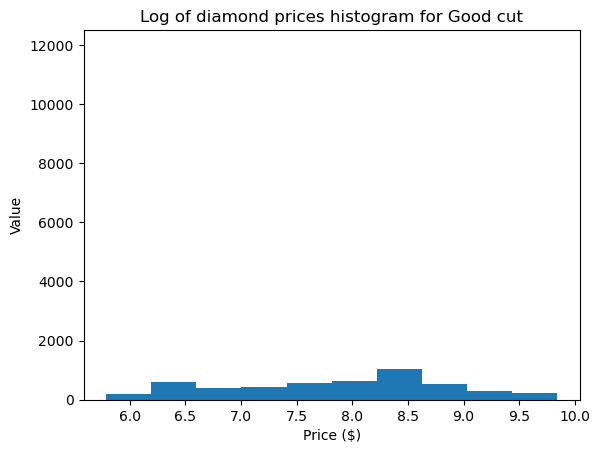

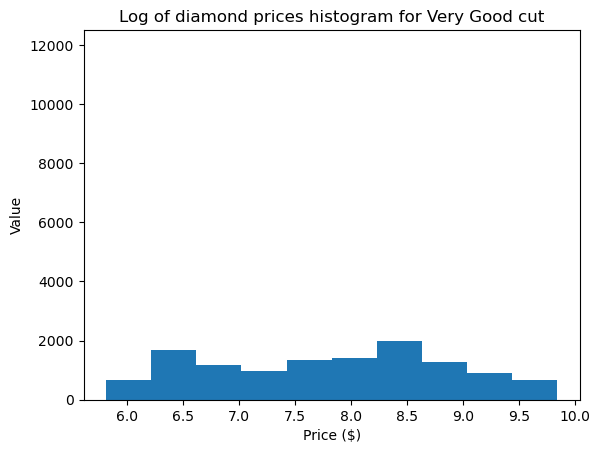

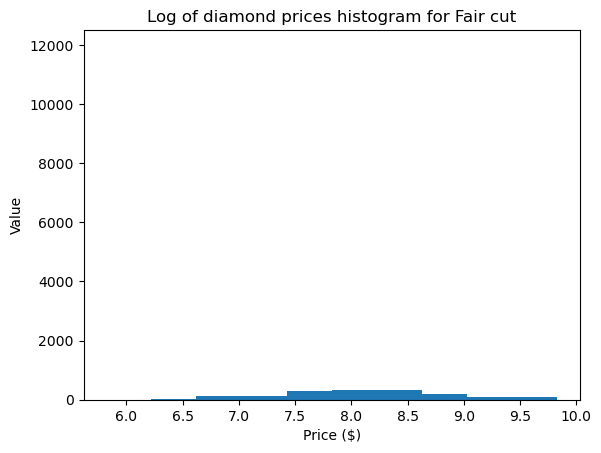

In [36]:
unique_cut = df['cut'].unique()

for cut in unique_cut:
    cut_df = df[df["cut"] == cut]
    
    plt.hist(cut_df['log_price'])
    plt.title(f'Log of diamond prices histogram for {cut} cut')
    plt.ylabel('Value')
    plt.xlabel('Price ($)')
    plt.ylim(0, 12500)
    
    plt.show()

Just visually, the log transformation definitely helped the distribution for all cuts. It highlights extreme outliers and makes many bunched up data points less significant, so a very skewed to the right graph like this one would be affected heavily. Fair and Good cut seem much closer to a normal distribution with the othrs having a sort of bimodal distribution.

In [37]:
good_cut_prices = df[df['cut'] == 'Good']['log_price']
v_good_cut_prices = df[df['cut'] == 'Very Good']['log_price']

premium_cut_prices = df[df['cut'] == 'Premium']['log_price']
ideal_cut_prices = df[df['cut'] == 'Ideal']['log_price']

t_stat_1, p_value_1 = stats.ttest_ind(good_cut_prices, v_good_cut_prices, equal_var=True)

t_stat_2, p_value_2 = stats.ttest_ind(premium_cut_prices, ideal_cut_prices, equal_var=True)

print(f"First t-test: t-statistic = {t_stat_1:.2f}, p-value = {p_value_1:.3f}")
print(f"Second t-test: t-statistic = {t_stat_2:.2f}, p-value = {p_value_2:.3f}")

First t-test: t-statistic = 2.55, p-value = 0.011
Second t-test: t-statistic = 28.34, p-value = 0.000


Using an alpha value of 0.05, both of these metrics are now much closer. The "Premium" and "Ideal" p-value is still 0.000, meaning we can reject the null hypothesis similar to before. "Good" and "Very Good" cut changed dramatically from the log transformation however, the p-value decreasing by almost 0.4. Now the p-value of 0.011 < 0.05, so we can also reject the null hypothesis for this one.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
